# Our objective 
### Our project creates a Python class to simulate growth scenarios. We use the famous Solow Model to construct our economic growth simulations. 


## What is the Solow Model? 
### The Solow growth model is a start in understanding differences in GDP per capita across countries.  


## Recap of the Solow growth model 
### We assume the economy has a production function that, at time  𝑡
### Yₜ = F(Kₜ, AₜLₜ)  

### We then assume that the production function has constant returns to scale. For most of our numerical work we will assume it is a Cobb-Douglas function: 
### Yₜ = Kₜᵅ(AₜKₜ)¹⁻ᵅ 

### We also assume that workers grow at a constant rate  n, technology at a constant rate  g, and that capital is accumulated through investment  It. Depreciation rate is δ. And this is a closed economy, so 𝑌𝑡=𝐶𝑡+𝐼𝑡

### Under the assumption of Cobb-Douglas production function, capital accumulates
### kₜ₊₁ = [skₜᵅ + (1-δ)kₜ] ⨯ (1+g)⁻¹(1+n)⁻¹ 
 
### Then the steady state is 
### k* = [s / (g+n+δ+gn)] ¹ᐟ⁽¹⁻ᵅ⁾

# Approach to the Project
	
## We decided to use OOP, using classes and methods in constructing our project. Why?
			
### Organisation - more accessible and comprehensible structure. Not only is it easier to read, but simpler to refer to other methods in other parts of the code, with the choice of a name and ease of calling
		
### Reusability - could call a method and reuse it to perform its function later in the code, rather than writing it out again

In [1]:
# 1.Create a class 'Solow' with attributes being the parameters of the model (n, s, 𝛿, 𝛼, g);(Cobb_Douglas function)
class Solow:
    def __init__(self, n, s, 𝛿, 𝛼, g):
        self.n, self.s, self.𝛿, self.𝛼, self.g = n, s, 𝛿, 𝛼, g
        
    # 2. Add a method which calculates the RHS of the equation (1), given a value for  𝑘𝑡    
    def calc_next_k(self,k_t):
        return ((self.s*(k_t**self.𝛼) + (1-self.𝛿)*k_t)/((1+self.g)*(1+self.n)))
    
    # 3.Add a method that updates the current value of k_t
    def update_k_t(self, k_t):
        k_t = self.calc_next_k(k_t)
        return k_t
    # 4.Add a method that generates a sequence of values for k_t, for t periods
    def gen_k_sequence(self, k_t, t):
        k_sequence = [k_t]
        for index in range(t):
            k_sequence.append(self.calc_next_k(k_sequence[index]))
        return k_sequence
    
    # 5.Add a method that calculates the steady state
    def calc_steady_state(self):
        return ((self.s)/(self.g + self.n + self.δ + self.g * self.n)) ** (1 / (1 - self.α))   
    
    # 6. Add a method that computes the value of the aggregate variables from a value of  𝑘, 𝐴, and 𝐿
    def calc_aggregate(self, k_t, A_t, L_t):
        agg_var = {}
        K_t = k_t * A_t * L_t
        Y_t = ((k_t * A_t * L_t)**(self.𝛼) * (A_t * L_t)**(1-self.𝛼))
        I_t = Y_t * self.s
        C_t = Y_t * (1-self.s)
        agg_var['K'], agg_var['Y'], agg_var['I'], agg_var['C'] = K_t, Y_t, I_t, C_t
        return agg_var 
    
    # 7. Add a method that computes the per worker variables.
    def calc_per_worker(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = A_t*L_t
        pw_var = {} #per-worker variables
        y_t = agg_var["Y"]/denominator #output per efficient worker
        c_t = agg_var["C"]/denominator #consumption per efficient worker
        i_t = agg_var["I"]/denominator #investment per efficient worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var

    # 8. Add a method that generates a series of per worker variables¶.
    def gen_per_worker_seq(self, k_t, A_t, L_t, t):
        pw_sequence ={'k':[],'y':[],'i':[],'c':[]} 
        keys = list(pw_sequence.keys())
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            for k in keys:
                pw_sequence[k].append(pw_var[k])
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t  
        return pw_sequence
    
      # 8. Add a method that generates a series of per worker variables¶.
    def gen_per_worker_seq2(self, k_t, A_t, L_t, t):
        pw_sequence = [] #k, y, i, c
        for index in range(t):
            pw_var = self.calc_per_worker(k_t, A_t, L_t)
            pw_sequence.append(pw_var) #entry starts from period 0
            #update
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence
    
     #9.For output per worker instead of per efficient worker
    def calc_per_worker2(self, k_t, A_t, L_t):
        agg_var = self.calc_aggregate(k_t, A_t, L_t)
        denominator = L_t #no more A_t
        pw_var = {} #per worker variables
        y_t = agg_var["Y"]/denominator #output per worker
        c_t = agg_var["C"]/denominator #consumption per worker
        i_t = agg_var["I"]/denominator #investment per worker
        
        pw_var['k'], pw_var['y'], pw_var['i'], pw_var['c'] = k_t,y_t,i_t,c_t

        return pw_var
            
    def gen_per_worker_seq3(self, k_t, A_t, L_t, t):
        pw_sequence = {'k':[], 'y':[], 'i':[], 'c':[]}
        keys = list(pw_sequence.keys())
        
        for index in range(t):
            pw_var = self.calc_per_worker2(k_t, A_t, L_t)
            for k in keys:
                pw_sequence[k].append(pw_var[k])
            
            #update
            k_t = self.calc_next_k(k_t)
            A_t = (1+self.g)*A_t
            L_t = (1+self.n)*L_t
        
        return pw_sequence

# Scenario Analysis 1
## Two countries only differ in their population growth rate n
### Two developed countries in Asia, with simialr economic characteristics but differ significantly in population growth rate

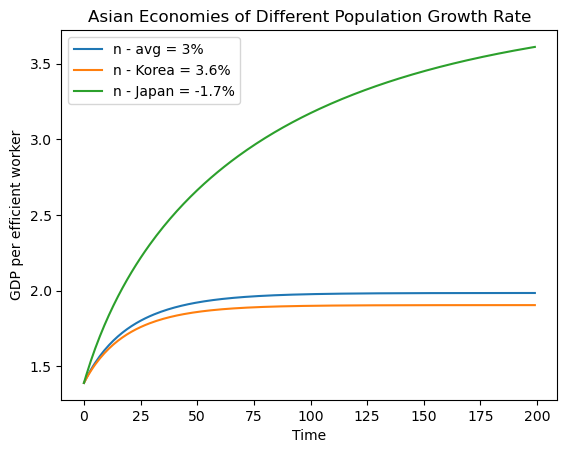

In [2]:
import matplotlib.pyplot as plt

time = 200
time_var = list(range(time))

# Baseline scenario
# Average popultion gorwth rate of Eastern Aisa is around 0.03, we will choose this average as a benchmark
average_east_asia = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)
# Then we have choose Korea and Japan in Eastern Aisa, which has very similar economic characteristics dut different population growth rate
Korea = Solow (n = 0.036, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)
Japan = Solow (n = -0.017, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

y_seq_avg = average_east_asia.gen_per_worker_seq(k_t = 3, A_t = 0.3, L_t = 100, t = time)['y']
y_seq_korea = Korea.gen_per_worker_seq(k_t = 3, A_t = 0.3, L_t = 100, t = time)['y']
y_seq_japan = Japan.gen_per_worker_seq(k_t = 3, A_t = 0.3, L_t = 100, t = time)['y']

plt.plot(time_var, y_seq_avg, label = 'n - avg = 3%')
plt.plot(time_var, y_seq_korea, label = 'n - Korea = 3.6%')
plt.plot(time_var, y_seq_japan, label = 'n - Japan = -1.7%')
plt.title('Asian Economies of Different Population Growth Rate')
plt.xlabel("Time")
plt.ylabel("GDP per efficient worker")
plt.legend()
plt.show()

# Scenario Analysis 2
## Two countries start with different capital endowment
### Set values of initial Solow parameters at average values - sourced from UN, ONS, ECB, Data Reportal

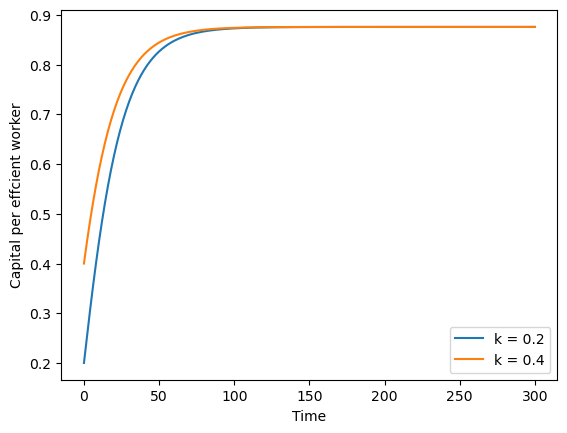

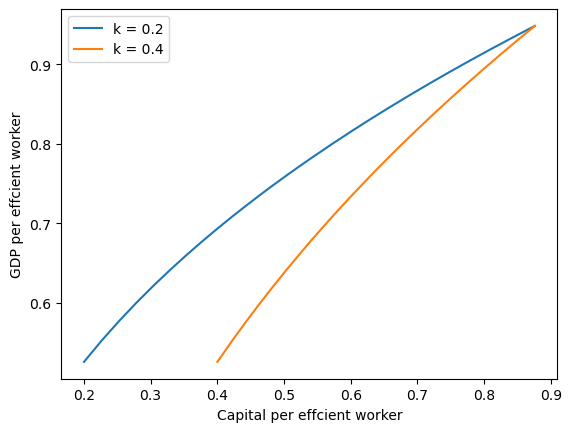

In [3]:
k_example = Solow (n = 0.011, s = 0.09, δ = 0.046, α = 0.40, g = 0.04)

# The steady state of k for a country with these parameters = 0.8760, so let us investigate the path here
# for two identical countries, only differing in starting endowments of capital. Let k0_1 = 0.2 and k0_2 = 0.4

k_sequence_1 = k_example.gen_k_sequence(k_t = 0.2, t = 300)
k_sequence_2 = k_example.gen_k_sequence(k_t = 0.4, t = 300)

y_sequence_1 = k_example.gen_per_worker_seq2(k_t = 0.2, A_t = 100, L_t = 100, t = 301)
y_sequence_1a = [year['y'] for year in y_sequence_1]
                                  
y_sequence_2 = k_example.gen_per_worker_seq2(k_t = 0.4, A_t = 100, L_t = 100, t = 301)
y_sequence_2a = [year['y'] for year in y_sequence_1]

time = 301
time_var = list(range(time))

plt.plot(time_var, k_sequence_1,label = 'k = 0.2')
plt.plot(time_var, k_sequence_2,label = 'k = 0.4')
plt.xlabel("Time")
plt.ylabel("Capital per effcient worker")
plt.legend()
plt.show()

plt.plot(k_sequence_1, y_sequence_1a, label = 'k = 0.2')
plt.plot(k_sequence_2, y_sequence_2a, label = 'k = 0.4')
plt.xlabel("Capital per effcient worker")
plt.ylabel("GDP per effcient worker")
plt.legend()
plt.show()                                    

# Scenario Analysis 3a
## Different technology growth rate g

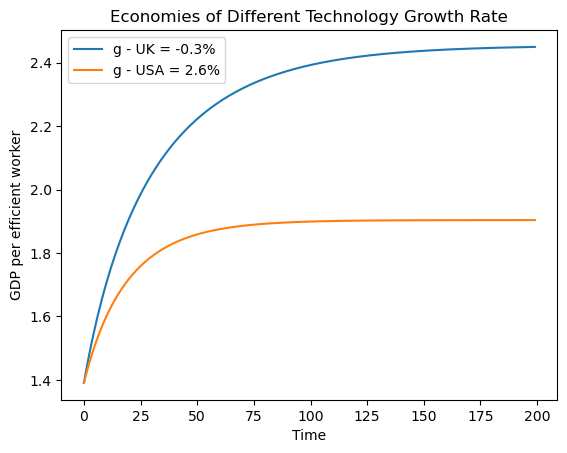

In [4]:
# what will happen to GDP per capita to a country that has no productivity growth, versus a country in which productivity grows at 2% per year?
# g=0 vs g=2% during COVID
country1 = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = -0.003) # UK had g = -0.3% in the covid pandemic
country2 = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.026) # USA had g = 2.6% in covid pandemic

time = list(range(200))

GDP1 = country1.gen_per_worker_seq2(k_t=3, A_t=0.3, L_t=500, t=200)
list1=[]
for i in range(200):
    list1.append(GDP1[i]['y'])


GDP2 = country2.gen_per_worker_seq2(k_t=3, A_t=0.3, L_t=500, t=200)
list2=[]
for x in range(200):
    list2.append(GDP2[x]['y'])   

plt.plot(time, list1, label = "g - UK = -0.3%")
plt.plot(time, list2, label = "g - USA = 2.6%")
plt.title("Economies of Different Technology Growth Rate")    
plt.xlabel("Time")
plt.ylabel("GDP per efficient worker")
plt.legend()
plt.show()


# Scenario Analysis 3b

## Different A0, same g:

### Industrial secrets

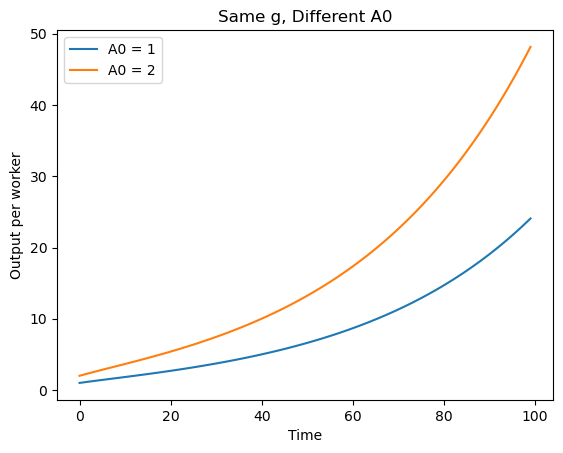

In [5]:
#Same g, different A0. Plot Output per worker over time 
economy1 = Solow (n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.026)

time = 100
x_var = list(range(time))

y_5 = economy1.gen_per_worker_seq3(k_t = 1, A_t = 1, L_t = 100, t = time)['y']
y_6 = economy1.gen_per_worker_seq3(k_t = 1, A_t = 2, L_t = 100, t = time)['y']

plt.plot(x_var, y_5, label = 'A0 = 1')
plt.plot(x_var, y_6, label = 'A0 = 2')
plt.title('Same g, Different A0')
plt.xlabel("Time")
plt.ylabel("Output per worker")
plt.legend()
plt.show()

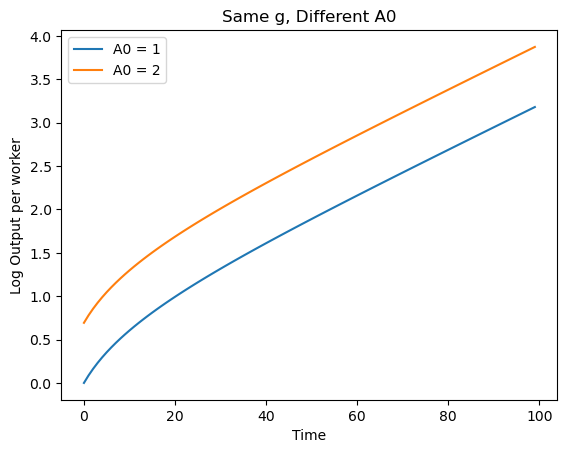

In [6]:
#Same g, different A0. Plot log output per worker over time 
import numpy as np
y_7 = np.log(economy1.gen_per_worker_seq3(k_t = 1, A_t = 1, L_t = 100, t = time)['y'])
y_8 = np.log(economy1.gen_per_worker_seq3(k_t = 1, A_t = 2, L_t = 100, t = time)['y'])

plt.plot(x_var, y_7, label = 'A0 = 1')
plt.plot(x_var, y_8, label = 'A0 = 2')
plt.title('Same g, Different A0')
plt.xlabel("Time")
plt.ylabel("Log Output per worker")
plt.legend()
plt.show()

# Scenario Analysis 4
## Scenario: There are likely fewer than 10^70 atoms in our galaxy, and 10^82 in the observable universe. 
### How long can Solow growth last until we reach incredible implications, e.g., when we'd need each atom in the observable universe to be worth more than the entire current world economy?

In [7]:
atoms_galaxy = 10**70
atoms_univ = 10**82      # Note that this is the observable universe

current_world_economy = 70*10**12 #£70 trillion

incredible_output_galaxy = current_world_economy * atoms_galaxy
t_incredible_output_galaxy = incredible_output_galaxy / (10**12)   # In units of trillions

incredible_output_univ = current_world_economy * atoms_univ
t_incredible_output_univ = incredible_output_univ / (10**12)   # In units of trillions

univ_1 = Solow(n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

# Setting values for the parameters consistent with the current world output
# Units are in trillions of pounds
print(univ_1.calc_aggregate(k_t=2, A_t=0.2, L_t=285)['Y'])

70.1752315606602


In [8]:
# Sequence of aggregate output ending in galaxy-incredible output
# Version 1: Baseline
k=2
A=0.2
L=285
tt=1

while univ_1.gen_per_worker_seq2(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_1.g)**(tt+1)) * (L*(1+univ_1.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_1 = univ_1.gen_per_worker_seq2(k, A, L, tt)
y_sequence_univ_1 = [year['y'] for year in pw_seq_univ_1]

Y_sequence_univ_1 = []
for i in range(tt):
    Y_sequence_univ_1.append(y_sequence_univ_1[i] * ( (A*(1+univ_1.g)**(i+1)) * (L*(1+univ_1.n)**(i+1)) ))

3815


In [9]:
# Version 2: 100x current TFP, population, and capital per worker
univ_2 = Solow(n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)

k=2*100
A=0.2*100
L=285*100
tt=1

while univ_2.gen_per_worker_seq2(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_2.g)**(tt+1)) * (L*(1+univ_2.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_2 = univ_2.gen_per_worker_seq2(k, A, L, tt)
y_sequence_univ_2 = [year['y'] for year in pw_seq_univ_2]

Y_sequence_univ_2 = []
for i in range(tt):
    Y_sequence_univ_2.append(y_sequence_univ_2[i] * ( (A*(1+univ_2.g)**(i+1)) * (L*(1+univ_2.n)**(i+1)) ))

3628


In [10]:
# Version 3: 10x TFP growth
univ_3 = Solow(n = 0.03, s = 0.3, δ = 0.01, α = 0.3, g = 0.02*10)

k=2
A=0.2
L=285
tt=1

while univ_3.gen_per_worker_seq2(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_3.g)**(tt+1)) * (L*(1+univ_3.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_3 = univ_3.gen_per_worker_seq2(k, A, L, tt)
y_sequence_univ_3 = [year['y'] for year in pw_seq_univ_3]

Y_sequence_univ_3 = []
for i in range(tt):
    Y_sequence_univ_3.append(y_sequence_univ_3[i] * ( (A*(1+univ_3.g)**(i+1)) * (L*(1+univ_3.n)**(i+1)) ))

891


In [11]:
# Galaxy Version 4: 10x population growth
univ_4 = Solow(n = 0.03*10, s = 0.3, δ = 0.01, α = 0.3, g = 0.02)
k=2
A=0.2
L=285
tt=1

while univ_4.gen_per_worker_seq2(k, A, L, tt)[-1]['y'] * ( (A*(1+univ_4.g)**(tt+1)) * (L*(1+univ_4.n)**(tt+1)) ) < t_incredible_output_univ:
    tt += 1
print(tt)

pw_seq_univ_4 = univ_4.gen_per_worker_seq2(k, A, L, tt)
y_sequence_univ_4 = [year['y'] for year in pw_seq_univ_4]

Y_sequence_univ_4 = []
for i in range(tt):
    Y_sequence_univ_4.append(y_sequence_univ_4[i] * ( (A*(1+univ_4.g)**(i+1)) * (L*(1+univ_4.n)**(i+1)) ))

670


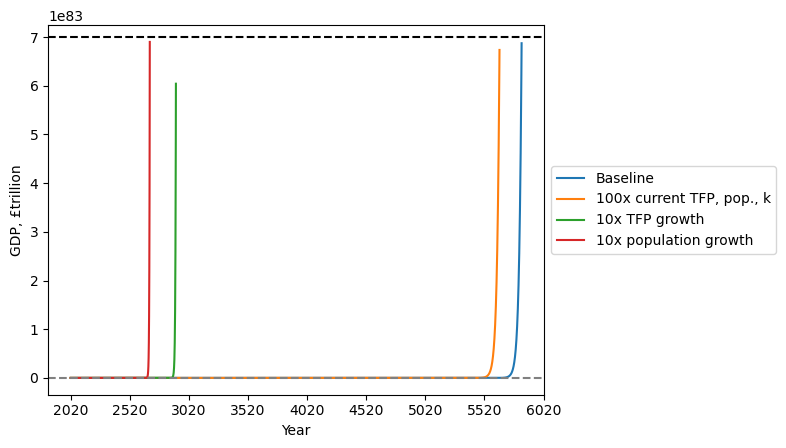

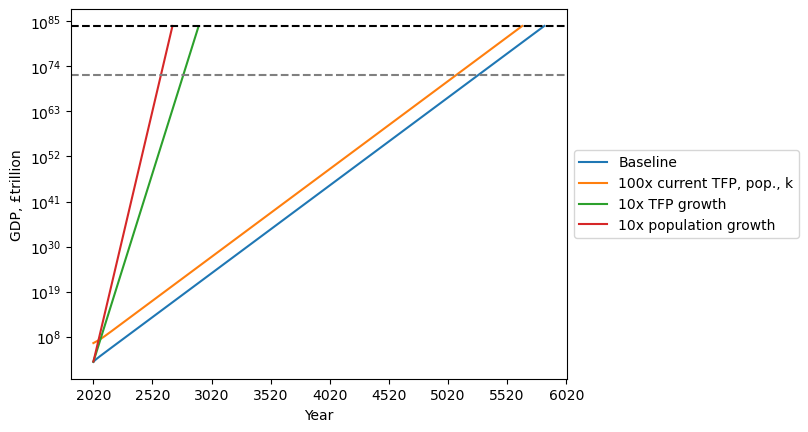

In [12]:
plt.plot(Y_sequence_univ_1, label="Baseline")
plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
plt.plot(Y_sequence_univ_3, label="10x TFP growth")
plt.plot(Y_sequence_univ_4, label="10x population growth")

plt.axhline(y=t_incredible_output_galaxy, color='gray', linestyle='--')
plt.axhline(y=t_incredible_output_univ, color='black', linestyle='--')

# Set x-axis values
x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
# Modify x-axis ticks
x_ticks = [x + 2020 for x in x_values]
plt.xticks(x_values, x_ticks)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("GDP, £trillion")
plt.show()


plt.plot(Y_sequence_univ_1, label="Baseline")
plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
plt.plot(Y_sequence_univ_3, label="10x TFP growth")
plt.plot(Y_sequence_univ_4, label="10x population growth")

plt.axhline(y=t_incredible_output_galaxy, color='gray', linestyle='--')
plt.axhline(y=t_incredible_output_univ, color='black', linestyle='--')

plt.yscale('log')

# Set x-axis values
x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
# Modify x-axis ticks
x_ticks = [x + 2020 for x in x_values]
plt.xticks(x_values, x_ticks)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("GDP, £trillion")

plt.show()

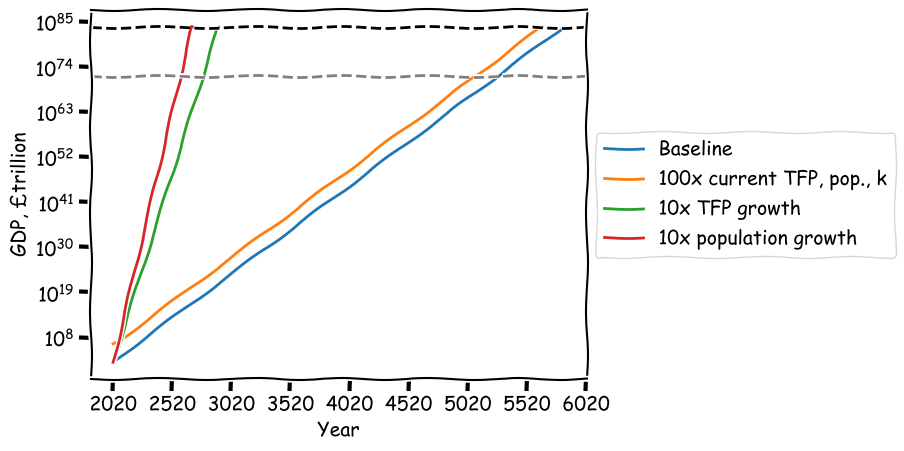

In [13]:
with plt.xkcd():
    # This figure will be in XKCD-style
    plt.plot(Y_sequence_univ_1, label="Baseline")
    plt.plot(Y_sequence_univ_2, label="100x current TFP, pop., k")
    plt.plot(Y_sequence_univ_3, label="10x TFP growth")
    plt.plot(Y_sequence_univ_4, label="10x population growth")
    
    plt.axhline(y=t_incredible_output_galaxy, color='gray', linestyle='--')
    plt.axhline(y=t_incredible_output_univ, color='black', linestyle='--')
    
    plt.yscale('log')

    x_values = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
    x_ticks = [x + 2020 for x in x_values]
    plt.xticks(x_values, x_ticks)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel("Year")
    plt.ylabel("GDP, £trillion")

# Obstacles
### Quite a few of us had issues getting step 8 to work (Adding a method that generates a series of per worker variables). Instead of rushing to get it done, we worked on it on our own and then created a method that everyone was happy with, using an approach that we felt worked best for the project.

### We also initially ran simulations with some fairly random values in the model. In order to make the results more interpretable, we had to think about and research values for the variables that reflected a specific scenario, such as a country in a specific period in time.

### Making sure that the code was consistent - since we worked on the project independently and then collaborated at various points throughout the week, we had to spend time ensuring that the code was consistent, for example, in terms of variable names, visuals, and, whether we used a dictionary, a tuple, or a list to store output.

# Tips for future projects
	
## Be careful with indexing. Coders think that
	
### the first natural number is 0		
### the final entry is the "-1"th		
### square bracket intervals [a,b] actually denote [a,b)	
### ...
	
## Make extensive use of ChatGPT—unless you want to become fluent without it
	
## Consider a Copilot subscription for Visual Studio Code (it knows the Solow model!)